In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_excel("SecondToLast.xlsx")
df.head()

,Brand,Price,Year,Kilometrage,Energie,Boite
0,Mercedes-Benz GLA,138500,2012,105000,Essence,Manuelle
1,Mercedes-Benz Classe E,227000,2015,320000,Essence,Automatique
2,BMW Série 5,260000,2016,78000,Essence,Manuelle
3,BMW Série 3,126000,2017,7000,Essence,Manuelle
4,BMW Série 5,117500,2012,4400,Essence,Manuelle


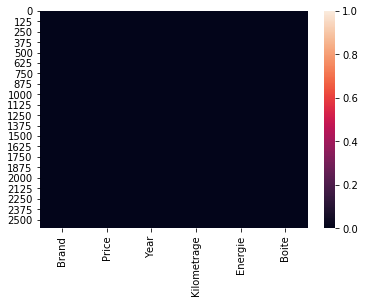

In [75]:
sns.heatmap(df.isna())

In [76]:
df.select_dtypes(include=[np.number])

,Year,Kilometrage
0,2012,105000
1,2015,320000
2,2016,78000
3,2017,7000
4,2012,4400
...,...,...
2599,2010,202000
2600,2009,40000
2601,2016,85000
2602,2018,0


In [77]:
df.drop_duplicates()
df.shape

(2604, 6)

In [78]:
df1 = df.dropna(axis = "rows")

In [79]:
df1.shape

(2603, 6)

In [80]:
df1.isnull().sum()

Brand          0
Price          0
Year           0
Kilometrage    0
Energie        0
Boite          0
dtype: int64

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 2602
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        2603 non-null   object
 1   Price        2603 non-null   object
 2   Year         2603 non-null   int64 
 3   Kilometrage  2603 non-null   int64 
 4   Energie      2603 non-null   object
 5   Boite        2603 non-null   object
dtypes: int64(2), object(4)
memory usage: 142.4+ KB


In [82]:
Ncontrainte = df1[df.Price == "N.C"].index
df2 =df1.drop(Ncontrainte , axis = "rows")


C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [83]:
df2.shape

(2401, 6)

In [84]:
df2.Price = pd.to_numeric(df2.Price)

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 0 to 2599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        2401 non-null   object
 1   Price        2401 non-null   int64 
 2   Year         2401 non-null   int64 
 3   Kilometrage  2401 non-null   int64 
 4   Energie      2401 non-null   object
 5   Boite        2401 non-null   object
dtypes: int64(3), object(3)
memory usage: 131.3+ KB


In [86]:
df2.Price.max()

10000000

In [87]:
df2.shape

(2401, 6)

In [88]:
df2.Price.describe()

count    2.401000e+03
mean     6.394394e+04
std      3.023005e+05
min      1.000000e+03
25%      2.900000e+04
50%      4.000000e+04
75%      6.320000e+04
max      1.000000e+07
Name: Price, dtype: float64

In [89]:
upper_limit = df2['Price'].mean() + 3*df2['Price'].std()
lower_limit = df2['Price'].mean() - 2*df2['Price'].std()


In [90]:
print(upper_limit)
print(lower_limit)

970845.3793741834
-540657.0202352947


In [91]:
df2 = df2[ (df2['Price'] < upper_limit)]


In [92]:
df2.shape

(2397, 6)

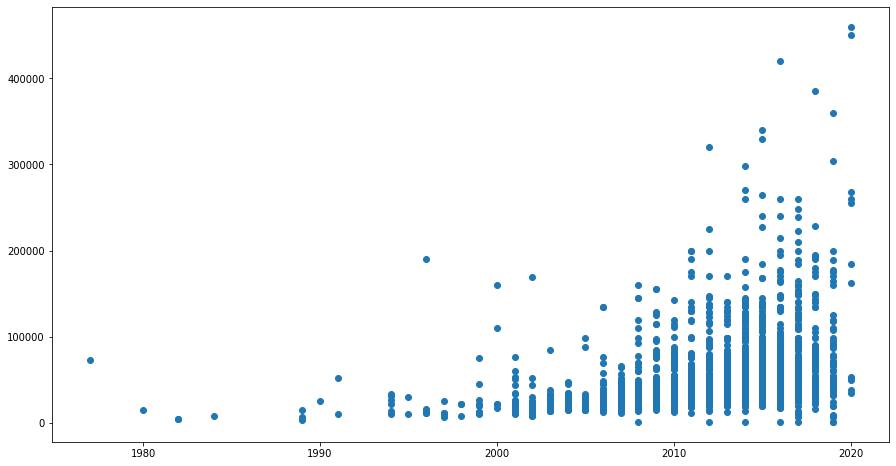

In [93]:
plt.figure(figsize=(15,8))
plt.scatter(df2.Year,df2.Price)

In [94]:
df.groupby('Brand').sum()
print(df[df.Brand == "Alfa Romeo 147"])

               Brand  Price  Year  Kilometrage  Energie        Boite
824   Alfa Romeo 147    N.C  2004        84000  Essence     Manuelle
2046  Alfa Romeo 147  32000  2008        31500  Essence  Automatique
2145  Alfa Romeo 147  29000  2008        29000  Essence     Manuelle


In [95]:
A = df2[df2.Price > 200000].index
df3 = df2.drop(A , axis = "rows")
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Brand'):
        m = np.mean(subdf.Price)
        st = np.std(subdf.Price)
        reduced_df = subdf[(subdf.Price>(m-st)) & (subdf.Price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df3 = remove_pps_outliers(df2)
df3.shape

(1525, 6)

In [96]:
brand_contrainte = df3.Brand.value_counts()
brand_contrainte_under_2 = brand_contrainte[brand_contrainte < 2]

In [97]:
df3.Brand = df3.Brand.apply(lambda x : "other" if x in brand_contrainte_under_2 else x )

In [98]:
df3.Brand.value_counts()

other                     77
Volkswagen Golf 7         62
BMW Série 3               46
Mercedes-Benz Classe C    44
Volkswagen Polo           35
                          ..
KIA Sorento                2
Peugeot 306                2
Volkswagen New Beetle      2
Fiat Palio                 2
Mercedes-Benz Classe B     2
Name: Brand, Length: 174, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
df3.head()

,Brand,Price,Year,Kilometrage,Energie,Boite
0,other,32000,2008,31500,Essence,Automatique
1,Alfa Romeo Giulietta,39000,2015,123000,Essence,Automatique
2,Alfa Romeo Giulietta,55000,2014,120000,Essence,Manuelle
3,Alfa Romeo Mito,32000,2009,189000,Diesel,Manuelle
4,Alfa Romeo Mito,31500,2007,139000,Essence,Manuelle


In [101]:
le = LabelEncoder()

In [102]:
df3.Boite = le.fit_transform(df3.Boite)
df3.Boite

0       0
1       0
2       1
3       1
4       1
       ..
1520    1
1521    0
1522    1
1523    1
1524    1
Name: Boite, Length: 1525, dtype: int32

In [103]:
df3.head()
print(df3.shape)

(1525, 6)


In [104]:
df_golf = df3[df3.Brand == "Volkswagen Golf 7"]
df_golf.head()

,Brand,Price,Year,Kilometrage,Energie,Boite
1347,Volkswagen Golf 7,63200,2016,163000,Essence,0
1348,Volkswagen Golf 7,62000,2015,69000,Essence,0
1349,Volkswagen Golf 7,65000,2014,191000,Essence,1
1350,Volkswagen Golf 7,59500,2013,124000,Essence,1
1351,Volkswagen Golf 7,67000,2011,198000,Essence,1


In [105]:
df3.Energie = le.fit_transform(df3.Energie)
df3.head()

,Brand,Price,Year,Kilometrage,Energie,Boite
0,other,32000,2008,31500,1,0
1,Alfa Romeo Giulietta,39000,2015,123000,1,0
2,Alfa Romeo Giulietta,55000,2014,120000,1,1
3,Alfa Romeo Mito,32000,2009,189000,0,1
4,Alfa Romeo Mito,31500,2007,139000,1,1


In [106]:
dummies = pd.get_dummies(df3.Brand)
dum = pd.get_dummies(df_golf.Brand)
dum

,Volkswagen Golf 7
1347,1
1348,1
1349,1
1350,1
1351,1
...,...
1404,1
1405,1
1406,1
1407,1


In [107]:
df4 = pd.concat([df3 , dummies.drop("other", axis = "columns")] , axis= "columns")
df_golf = pd.concat([df_golf , dum] , axis="columns")

In [108]:
df4.head()
print(df4.shape)

(1525, 179)


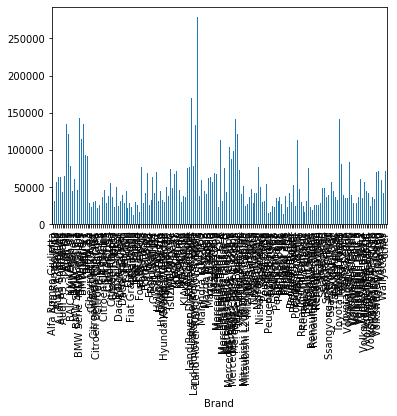

In [109]:
df4.groupby('Brand').Price.mean().plot.bar()

In [110]:
X = df4.drop(['Brand' , 'Price'] , axis="columns")
y = df4.Price

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.tree import DecisionTreeRegressor

In [112]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 7 ) 
                                                       

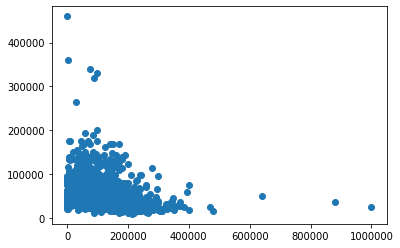

In [113]:
#plt.scatter(X_train.loc[: , ["Year"]],X_train.loc[:,['Kilometrage']])
#plt.scatter(X_test.loc[: , ["Year"]],X_test.loc[:,['Kilometrage']])
plt.scatter(X.values[:,1],y.values)


In [114]:
X_train[:-2]

,Year,Kilometrage,Energie,Boite,Alfa Romeo Giulietta,Alfa Romeo Mito,Audi A3,Audi A3 Berline,Audi A3 Sportback,Audi A4,...,Volkswagen Passat,Volkswagen Passat CC,Volkswagen Polo,Volkswagen Polo Sedan,Volkswagen Scirocco,Volkswagen Tiguan,Volkswagen Touareg,Volvo S60,Volvo S80,Wallyscar Izis
264,2009,240000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1208,2015,131000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
738,2018,53000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513,2010,235000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,2019,162000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,2018,34700,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919,2014,81325,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,2012,180000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,2015,184000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
model1 = LinearRegression()
model2  = Lasso(alpha=2)

In [116]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
model1.score(X_test,y_test)

0.7279289277021881

In [118]:
model2.fit(X_train , y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [119]:
model2.score(X_test , y_test)

0.7412537723909259

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

cv = ShuffleSplit(n_splits= 5 , test_size = 0.2 , random_state = 3 ) 
cross_val_score(LinearRegression() , X , y , cv = cv ) 

array([ 7.71376505e-01,  7.97252960e-01,  6.83529807e-01, -4.68206050e+13,
        7.01320106e-01])

In [121]:
def find_vest_model_using_gridsearchcv(X,y):
    
    algos = {
        
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True , False]
                        }
                              },
        
        'lasso' : {
            'model' : Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection' : ['random' , 'cyclic']
                      }
                   },
        
        
        'decesion_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
            'criterion':['mse','friedman_mse'],
            'splitter' : ['best', 'random']       
                       }   
                          }
            }

    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=3)
    
    for algo_name, config in algos.items():
            
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Best_Score': gs.best_score_,
            'Best_Parms': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['Model','Best_Score','Best_Parms']) 
    

    

In [122]:
find_vest_model_using_gridsearchcv(X,y)

,Model,Best_Score,Best_Parms
0,linear_regression,-9.364121e+12,{'normalize': False}
1,lasso,7.108275e-01,"{'alpha': 2, 'selection': 'random'}"
2,decesion_tree,2.080471e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [123]:
def predict(brand , year , kilometrage , energie , boite):
    loc_index = np.where(X.columns == brand)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = kilometrage
    x[2] = energie
    x[3] = boite
    x[loc_index] = 1
    
    if model1.predict([x])[0] > 0 :
        return  model2.predict([x])[0]
    else:
        print ('Value Impossible')

In [124]:
predict("Volkswagen Golf 7" , 2014 , 60000 , 1 , 1)

61226.30408528447

In [125]:
predict("Volkswagen Golf 7" , 2014 , 140000 , 1 , 1)

56568.81052410137

In [126]:
predict("BMW Série 3" , 2008 , 250000 , 1 , 0)

59980.347151000984

In [127]:
predict("Volkswagen Passat" , 2013 , 170000 , 0 , 1)

47755.227084746584

In [128]:
predict("Volkswagen Passat" , 2006 , 57000 , 1 , 0)

43229.06400531018

In [129]:
predict("Mercedes-Benz Classe C" , 2015 , 100000 , 1 , 0)

88137.83919009706

In [130]:
predict("Audi Q2" , 2018 , 50000 , 1 , 0)

130727.00205877796

In [131]:
predict("Audi Q2" , 2019 , 4000 , 1 , 0)

135322.22999579785

In [132]:
predict("BMW Série 3" , 2018 , 4000 , 1 , 0)

93473.8312450354

In [133]:
predict("Volkswagen Golf 7" , 2020 , 0 , 1 , 0)

81928.96987410868

In [134]:
predict("Volkswagen Golf 7" , 2016 , 70000 , 1 , 0)

70184.98645071499

In [135]:
predict("Volkswagen Golf 7" , 2017 , 70000 , 0 , 0)

75493.37513118424

In [136]:
predict("Volkswagen Golf 7" , 2013 , 220000 , 0 , 1)

53385.367364708334

In [137]:
predict("Volkswagen Passat" , 2018 , 15000 , 1 , 0)

68680.27779700654

In [138]:
import pickle
pickle.dump(model1 , open('model.pkl' , 'wb'))

In [141]:
model = pickle.load(open('model.pkl', 'rb'))